Whenever we work with machine learning algorithms that use a stochastic process (e.g. random numbers), it is a good idea to set the random number seed so you can run the same code again and again and get the same result.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/home/teresas/notebooks/deep_learning/files/diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In this example, we will use a fully-connected network structure with three layers. Fully connected layers are defined using the Dense class. We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [13]:
# We create a Sequential model and add layers one at a time until we are happy with our network topology.
model = Sequential()
# In this case, we initialize the network weights to a small random number generated from 
# a uniform distribution (‘uniform‘), in this case between 0 and 0.05 because that is the 
# default uniform weight initialization in Keras. Another traditional alternative would be 
# ‘normal’ for small random numbers generated from a Gaussian distribution.
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# These days, better performance is achieved using the rectifier 'relu' activation function.
model.add(Dense(8, init='uniform', activation='relu'))
# We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and 
# easy to map to either a probability of class 1 or snap to a hard classification of either 
# class with a default threshold of 0.5.
model.add(Dense(1, init='uniform', activation='sigmoid'))

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In [14]:
# Compile model
# a binary classification problem is defined in Keras as “binary_crossentropy“
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

We can see the model configurations and info

In [9]:
# we can see the model configuration
model.get_config()

[{'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'relu',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'batch_input_shape': (None, 8),
   'bias': True,
   'init': 'uniform',
   'input_dim': 8,
   'input_dtype': 'float32',
   'name': 'dense_1',
   'output_dim': 12,
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'relu',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'init': 'uniform',
   'input_dim': 12,
   'name': 'dense_2',
   'output_dim': 8,
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'sigmoid',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'init': 'uniform',
   'input_dim': 8,
   'name': 'dense_3',
   'output_dim': 1

In [22]:
# individual layers configuration
model.layers[2].get_config()

{'W_constraint': None,
 'W_regularizer': None,
 'activation': 'sigmoid',
 'activity_regularizer': None,
 'b_constraint': None,
 'b_regularizer': None,
 'bias': True,
 'init': 'uniform',
 'input_dim': 8,
 'name': 'dense_3',
 'output_dim': 1,
 'trainable': True}

In [14]:
# counting model's parameters
model.count_params()

221

In [23]:
# (input_dim x output_dim) + output_dim
model.layers[2].count_params()

9

We can train or fit our model on our loaded data by calling the fit() function on the model. The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nb_epoch argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the batch_size argument.

In [7]:
# summary and allocation of all data to show in tensorboard
callback = keras.callbacks.TensorBoard(log_dir='/home/teresas/notebooks/deep_learning/files/diabetes/', \
                                         histogram_freq=1, write_graph=True, write_images=False)

In [12]:
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=[callback], verbose=0)

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

In [9]:
# evaluate the model: This will generate a prediction for each input and output pair 
# and collect scores, including the average loss and any metrics you have configured, such as accuracy.
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0sacc: 76.43%


We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before. Running this modified example now prints the predictions for each input pattern. We could use these predictions directly in our application if needed.

In [45]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,

# Ploting training information

In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


If the model is **overfitting** the graph will show great performance on the training data and poor performance on the test data.

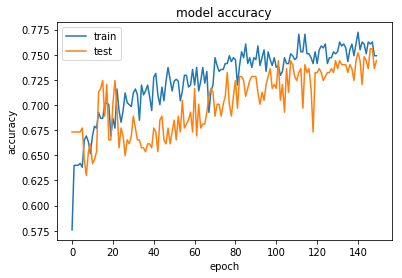

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

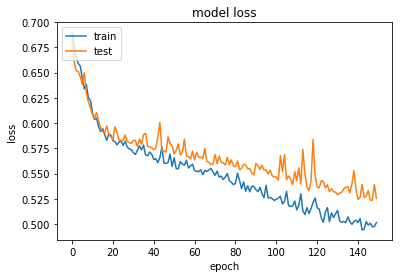

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# layers fluxogram
from keras.utils.visualize_util import plot
plot(model, to_file='/home/teresas/notebooks/deep_learning/files/model.png')

# Saving the results to load later

Keras provides the ability to describe any model using JSON format with a to_json() function. This can be saved to file and later loaded via the model_from_json() function that will create a new model from the JSON specification.
The weights are saved directly from the model using the save_weights() function and later loaded using the symmetrical load_weights() function.

In [39]:
from keras.models import model_from_json
import os

Saving the data

In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("/home/teresas/notebooks/deep_learning/files/model_diabetes.json", "w") as json_file:
    json_file.write(model_json)

In [41]:
# serialize weights to HDF5
model.save_weights("/home/teresas/notebooks/deep_learning/files/model_diabetes.h5")
print("Saved model to disk")

Saved model to disk


Loading the data

In [42]:
# load json and create model
json_file = open('/home/teresas/notebooks/deep_learning/files/model_diabetes.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/home/teresas/notebooks/deep_learning/files/model_diabetes.h5")
print("Loaded model from disk")

Loaded model from disk


Getting the same result as before

In [44]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

 32/768 [>.............................] - ETA: 0sacc: 77.34%
